<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [4]:
df = pd.read_csv("../../DATA/Employee-attrition.csv") 

In [7]:
df.head(15)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [8]:
df.tail(8)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49645,8223,10/1/2013 0:00,2/11/1994,6/24/2013,10/17/2013,19,0,Trail,Customer Service,Cashier,33,M,Male,Resignaton,Voluntary,2013,TERMINATED,STORES
49646,8226,9/1/2013 0:00,2/16/1994,6/26/2013,9/14/2013,19,0,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49647,8231,12/1/2015 0:00,3/1/1994,7/3/2013,12/30/2015,21,2,Princeton,Customer Service,Cashier,27,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [9]:
columns = df.columns
index = df.index
data = df.values

In [ ]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [ ]:
index

RangeIndex(start=0, stop=49653, step=1)

In [ ]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find the shape of the dataframe

In [10]:
# A:df.shape

In [11]:
df.shape

(49653, 18)

#### 1.B Find the data types of the dataframe

In [ ]:
# A:df.dtypes

In [12]:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find the number of data types in the dataframe



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [13]:
df.dtypes.value_counts()

object    13
int64      5
Name: count, dtype: int64

#### 1.D Use Info

Use info and explore the difference.

In [ ]:
# A:df.info()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# 2. Selecting Column in Data Frame

#### 2.A Check Values of the `job_title` column

In [16]:
# A:df['job_title']

In [19]:
df['job_title']

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

#### 2.B Find how many rows are in each job title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [22]:
job_title = df['job_title']
job_title.value_counts()

job_title
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer              

In [ ]:
# A: job_title = df['job_title']
job_title.value_counts()

#### 2.C [BONUS] Write a function to count the number of rows


```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [24]:
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows

#### 2.D Describe `age`

Find the count, mean, std, min, max of the column 'age'

In [27]:
age = df['age']
age.describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [ ]:
# A: age = df['age']
age.describe()

##### 2.E [BONUS] Describe all numeric columns of the dataframe

Find the count, mean, std, min, max of all columns of the dataframe

In [28]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [ ]:
# A: df.describe()

# 3. Make the index meaningful by making `EmployeeID` the index

In [31]:
df.set_index("EmployeeID", inplace=True)

KeyError: "None of ['EmployeeID'] are in the columns"

In [30]:
print(df.index)

Index([1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318,
       ...
       8188, 8214, 8223, 8226, 8231, 8258, 8264, 8279, 8296, 8321],
      dtype='int64', name='EmployeeID', length=49653)


In [ ]:
# A: df.set_index("EmployeeID", inplace=True)

print(df.index)

#### 3.A Find a specific row using the index

In [34]:
print('df.loc["1318"]', df.loc[8188])

df.loc["1318"]              recorddate_key birthdate_key orighiredate_key  \
EmployeeID                                                   
8188        12/31/2013 0:00    10/22/1993        4/25/2013   
8188         10/1/2014 0:00    10/22/1993        4/25/2013   

           terminationdate_key  age  length_of_service city_name  \
EmployeeID                                                         
8188                10/25/2014   20                  0  Victoria   
8188                10/25/2014   21                  1  Victoria   

             department_name job_title  store_name gender_short gender_full  \
EmployeeID                                                                    
8188        Customer Service   Cashier          46            F      Female   
8188        Customer Service   Cashier          46            F      Female   

           termreason_desc   termtype_desc  STATUS_YEAR      STATUS  \
EmployeeID                                                            
8188

In [35]:
df.iloc[100]

recorddate_key          12/31/2006 0:00
birthdate_key                 1/28/1965
orighiredate_key              9/10/1989
terminationdate_key            1/1/1900
age                                  41
length_of_service                    17
city_name                       Nanaimo
department_name        Store Management
job_title                 Store Manager
store_name                           18
gender_short                          F
gender_full                      Female
termreason_desc          Not Applicable
termtype_desc            Not Applicable
STATUS_YEAR                        2006
STATUS                           ACTIVE
BUSINESS_UNIT                    STORES
Name: 1331, dtype: object

In [ ]:
# A: print('df.loc["1318"]', df.loc[8188])

df.iloc[100]

#### 3.B Sort the dataframe using the index

In [37]:
df.sort_index()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,12/31/2013 0:00,12/28/1994,12/10/2013,1/1/1900,19,0,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8335,12/31/2015 0:00,12/28/1994,12/10/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8336,12/31/2015 0:00,12/31/1994,12/11/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES


In [ ]:
# A: df.sort_index()

#### 3.C [BONUS] Sort the dataframe using `age`

In [40]:
df.sort_values(['age'], ascending=[0])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
2800,6/1/2007 0:00,6/3/1942,12/9/1993,6/3/2007,65,13,Prince George,Meats,Meat Cutter,26,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2674,2/1/2007 0:00,2/11/1942,8/19/1993,2/11/2007,65,13,Kelowna,Meats,Meat Cutter,16,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2598,11/1/2006 0:00,11/22/1941,5/30/1993,11/22/2006,65,13,Abbotsford,Produce,Produce Clerk,1,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2599,11/1/2006 0:00,11/25/1941,6/2/1993,11/25/2006,65,13,Fort Nelson,Meats,Meat Cutter,11,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2608,12/1/2006 0:00,12/1/1941,6/8/1993,12/1/2006,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,12/31/2013 0:00,8/11/1994,9/27/2013,1/1/1900,19,0,Vernon,Customer Service,Cashier,36,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8222,12/31/2013 0:00,2/1/1994,6/18/2013,1/1/1900,19,0,Williams Lake,Customer Service,Cashier,40,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8221,12/31/2013 0:00,1/28/1994,6/16/2013,1/1/1900,19,0,New Westminster,Customer Service,Cashier,21,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES


In [ ]:
# A: df.sort_values(['age'], ascending=[0])

#### 3.D [BONUS] Using `sample` select any row

In [41]:
df.sample()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
3655,12/31/2010 0:00,6/21/1961,3/28/1996,1/1/1900,49,14,Prince George,Meats,Meat Cutter,26,F,Female,Not Applicable,Not Applicable,2010,ACTIVE,STORES


In [ ]:
# A: df.sample()

# 4. Query Data Frame

#### 4.A Find rows Where `job_title` is CEO

In [42]:
df['job_title'] == 'CEO'

EmployeeID
1318     True
1318     True
1318     True
1318     True
1318     True
        ...  
8258    False
8264    False
8279    False
8296    False
8321    False
Name: job_title, Length: 49653, dtype: bool

In [ ]:
# A: df['job_title'] == 'CEO'

#### 4.B Group by `age` and find how many there are of each age

In [44]:
age_dist = df.groupby(['age']).size()
age_dist

age
19     158
20     408
21     703
22     815
23     960
24    1111
25    1197
26    1210
27    1235
28    1225
29    1227
30    1212
31    1146
32    1153
33    1164
34    1188
35    1189
36    1176
37    1149
38    1156
39    1142
40    1130
41    1135
42    1152
43    1150
44    1157
45    1141
46    1161
47    1173
48    1180
49    1196
50    1218
51    1207
52    1188
53    1188
54    1159
55    1168
56    1154
57    1130
58    1130
59    1128
60    1109
61     757
62     712
63     667
64     646
65     593
dtype: int64

In [ ]:
# A: age_dist = df.groupby(['age']).size()
age_dist

# 5. Visualisation


#### 5.A Plot a histogram of `age`

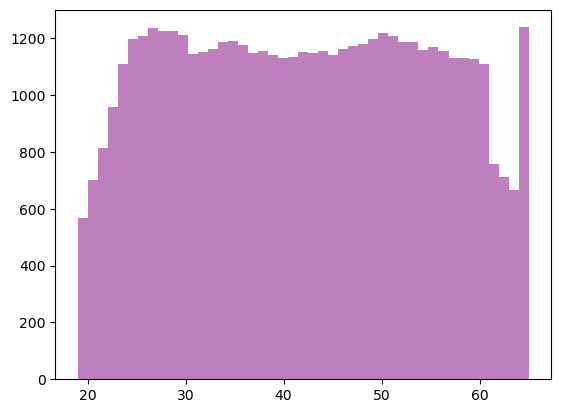

In [52]:
num_bins = 45
n, bins, patches = plt.hist(df.age, num_bins, facecolor='purple', alpha=0.5)

In [ ]:
# A: num_bins = 45
n, bins, patches = plt.hist(df.age, num_bins, facecolor='purple', alpha=0.5)

#### 5.B BoxPlot of `age`

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

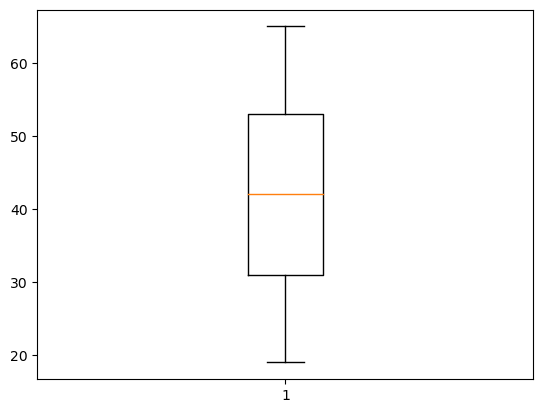

In [53]:
plt.boxplot(df.age)
plt.yscale('linear')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

In [ ]:
# A:

#### 5.C Create a scatterplot of `age` and `length_of_service`

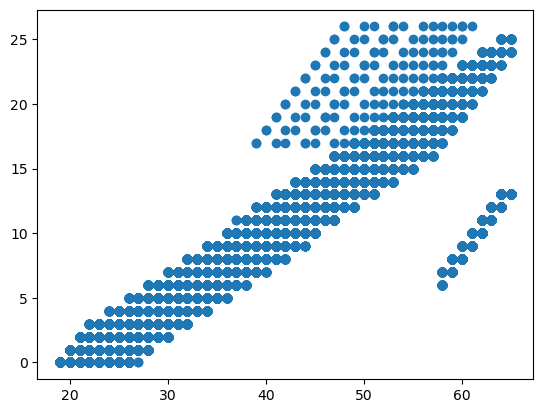

In [54]:
plt.scatter(df.age, df.length_of_service)

In [ ]:
# A: plt.scatter(df.age, df.length_of_service)

#### 5.D Print a statistical summary of `age`

In [55]:
print('statistical summary of observations=', stats.describe(df.age))

statistical summary of observations= DescribeResult(nobs=49653, minmax=(19, 65), mean=42.077034620264634, variance=154.43672646776537, skewness=0.023093117697645202, kurtosis=-1.1473302603578608)


In [ ]:
# A: print('statistical summary of observations=', stats.describe(df.age))



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



